In [1]:
import scipy as sp
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/Titanic/train.csv',  header=0, index_col=0)

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
df['Survived'].value_counts()
# Quite a very balanced labeled dataset

0    549
1    342
Name: Survived, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

def process_data(df_raw):
    result = df_raw
    encoder = LabelEncoder()
    
    result['Cabin']=result['Cabin'].fillna('NA') # Cabin might be important, consider custom encoding it
    result = result.dropna(how='any')
    result = result.drop('Ticket', axis=1)

    result['Embarked'] = encoder.fit_transform(result['Embarked'])
    result['Sex'] = encoder.fit_transform(result['Sex'])
    return result


In [8]:
processed = process_data(df)
processed.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NA,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NA,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NA,2


In [9]:
processed[['Embarked','Sex']].head()

,Embarked,Sex
PassengerId,,
1,2,1
2,0,0
3,2,0
4,2,0
5,2,1


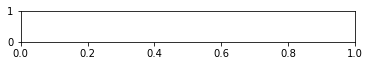

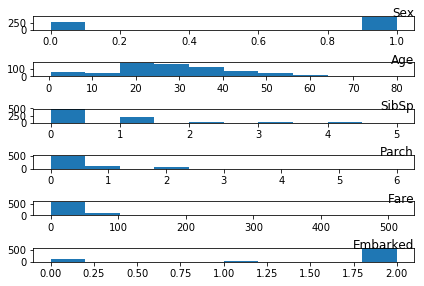

In [28]:
from matplotlib import pyplot
subplotCols = ['Sex','Age','SibSp','Parch','Fare','Embarked']
row = 1
pyplot.figure()
for col in subplotCols:
    pyplot.subplot(len(subplotCols), 1, row)
    y = processed[col].values
    pyplot.hist(y)
    pyplot.title(col,y=0.5, loc='right')
    row += 1

pyplot.tight_layout()    
pyplot.show()

In [11]:
# How about correlation of the features (columns)?
# Let's do it after preprocessing
features = ['Sex','Age','SibSp','Parch','Fare','Embarked']
df_selected_features = df[features].copy()
print(df_selected_features.corr()) # by default what method does it use?

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [12]:
print(df_selected_features.corr(method='pearson'))
# So looks like the default method is pearson

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [13]:
print(df_selected_features.corr(method='kendall'))

            Age     SibSp     Parch      Fare
Age    1.000000 -0.142746 -0.200112  0.093249
SibSp -0.142746  1.000000  0.425241  0.358262
Parch -0.200112  0.425241  1.000000  0.330360
Fare   0.093249  0.358262  0.330360  1.000000


In [14]:
print(df_selected_features.corr(method='spearman'))

            Age     SibSp     Parch      Fare
Age    1.000000 -0.182061 -0.254212  0.135051
SibSp -0.182061  1.000000  0.450014  0.447113
Parch -0.254212  0.450014  1.000000  0.410074
Fare   0.135051  0.447113  0.410074  1.000000


In [ ]:
# Looks like they are not perfectly uncorrelated. A more ideal result will be zeros for all the off diagonal fields

### Now we are ready to build some models for predicting the survival rate 

1. *Decision Tree*

In [29]:
processed.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NA,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NA,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NA,2


In [31]:
features = ['Sex','Age','SibSp','Parch','Fare','Embarked']

def create_training_set(df, features, label = 'Survived'):
    X = df[features].values
    y = df[label].values
    return X, y
    

In [ ]:
# Creating the training set and label

In [32]:
X, y = create_training_set(processed, features)

In [33]:
X

array([[  1.    ,  22.    ,   1.    ,   0.    ,   7.25  ,   2.    ],
       [  0.    ,  38.    ,   1.    ,   0.    ,  71.2833,   0.    ],
       [  0.    ,  26.    ,   0.    ,   0.    ,   7.925 ,   2.    ],
       ..., 
       [  0.    ,  19.    ,   0.    ,   0.    ,  30.    ,   2.    ],
       [  1.    ,  26.    ,   0.    ,   0.    ,  30.    ,   0.    ],
       [  1.    ,  32.    ,   0.    ,   0.    ,   7.75  ,   1.    ]])

In [21]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.2.


In [34]:
from sklearn import tree
from sklearn.tree import export_graphviz

tree_classifier_max_leaf = tree.DecisionTreeClassifier(max_leaf_nodes=12)
tree_classifier_max_leaf.fit(X,y)

dot_data_max_leaf = tree.export_graphviz(tree_classifier_max_leaf,
                                 out_file=None,
                                 feature_names = features,
                                 class_names = ['Dead', 'Survived'],
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)



In [ ]:
# 1st way of plotting decsion tree - error with ExecutableNot found. Problematic with graphviz executables not found.

# Max leaf node plot

In [ ]:
# 2nd way of plotting decision tree

In [ ]:
import pydotplus
from IPython.display import Image

In [ ]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Anaconda\\Library\\bin\\graphviz'
graph = pydotplus.graphviz.graph_from_dot_data(dot_data_max_leaf)
Image(graph.create_png())

## Max depth plot

In [ ]:
tree_classifier_max_depth = tree.DecisionTreeClassifier(max_depth=4)
tree_classifier_max_depth.fit(X,y)

dot_data_max_depth = tree.export_graphviz(tree_classifier_max_depth,
                                 out_file=None,
                                 feature_names = features,
                                 class_names = ['Dead', 'Survived'],
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

In [ ]:
graph = pydotplus.graphviz.graph_from_dot_data(dot_data_max_depth)
Image(graph.create_png())

In [ ]:
# In both max depth and max leaf methods, "sex" is the root node of the decision tree. Meaning it gives the most
# information gain among other features.
# What alogrithm does sklearn decision tree classifier uses?
# Answer: http://scikit-learn.org/stable/modules/tree.html#tree-algorithms
# It is an optimized vesion of CART

## Combination of Min sample split and max leaf nodes

In [ ]:
tree_classifier_combine = tree.DecisionTreeClassifier(min_samples_split=100, max_leaf_nodes=8)
tree_classifier_combine.fit(X,y)

dot_data_combine = tree.export_graphviz(tree_classifier_combine,
                                 out_file=None,
                                 feature_names = features,
                                 class_names = ['Dead', 'Survived'],
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

In [ ]:
graph = pydotplus.graphviz.graph_from_dot_data(dot_data_max_depth)
Image(graph.create_png())

In [ ]:
# How to decide which feature is more important?
# Gini importance!!

In [ ]:
features

In [ ]:

tree_classifier_combine.feature_importances_

In [ ]:
tree_classifier_max_depth.feature_importances_

In [ ]:
# Side note this is another way of exporting data for visualization

In [ ]:
# 3rd way of visualizing decision tree - using the string file and using graphviz web (google it!)

In [ ]:
with open("titanic_classifer.dot", "w") as f:
    f = tree.export_graphviz(tree_classifier,
                                 out_file=f,
                                 feature_names = features,
                                 class_names = ['Dead', 'Survived'],
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

# How good is our model?

In [36]:
df_test = pd.read_csv('../Data/Titanic/test.csv',  header=0, index_col=0)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
processed = process_data(df_test)
processed.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NA,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NA,2
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NA,1
895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NA,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NA,2


In [38]:
processed.index.values.tolist()

[892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 915,
 916,
 917,
 918,
 919,
 920,
 922,
 923,
 924,
 926,
 927,
 929,
 930,
 932,
 934,
 935,
 936,
 937,
 938,
 940,
 941,
 942,
 943,
 944,
 945,
 947,
 948,
 949,
 951,
 952,
 953,
 954,
 955,
 956,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 969,
 970,
 971,
 972,
 973,
 974,
 978,
 979,
 981,
 982,
 984,
 986,
 987,
 988,
 989,
 990,
 991,
 992,
 993,
 995,
 996,
 997,
 998,
 1001,
 1002,
 1004,
 1005,
 1006,
 1007,
 1009,
 1010,
 1011,
 1012,
 1014,
 1015,
 1017,
 1018,
 1020,
 1021,
 1022,
 1023,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1039,
 1041,
 1042,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1053,
 1054,
 1056,
 1057,
 1058,
 1059,
 1061,
 1063,
 1064,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1076,
 1077,
 1078,
 1079,
 1081,
 1082,
 1084,
 1085,
 1086,
 10

In [4]:
processed_df = process_data(pd.read_csv('../Data/Titanic/test.csv',  header=0, index_col=0))
def generate_prediction(processed_df, features, classifier = tree_classifier_combine):
    prediction = {}
    X_features = processed_df[features]
    X = X_features.values
    p_id = processed_df.index.values
    result = classifier.predict(X)
    return result, dict(zip(p_id.tolist(), result.tolist()))
    
y_predict, result = generate_prediction(processed_df, features, tree_classifier_combine)

NameError: name 'process_data' is not defined

In [ ]:
# Write to a file for submission to Kaggle

In [ ]:
import csv

with open('Data/Titanic/submission.txt', 'wb') as f:
    writer = csv.writer(f, delimiter=',', quotechar='\"')
    writer.writerow(["PassengerId","Survived"])
    for key, value in sorted(result.items()):
        try:
            writer.writerow([key, value])
        except:
            print e

## Precision and Accuracy - Putting it all together

In [41]:
# Find precision and accuracy score
# However there is no label ('Survived') column in the test.csv
# Which means that we need to use training data (train.csv) to do validation.
# Use 30% of train data to validate our accuracy and precision score before submission.

In [3]:
import math
def split_training_set(df, ratio=0.7):
    cutoff = int(math.floor(ratio*len(df.index)))
    train_X = df[:cutoff]
    validation_X = df[cutoff:]
    return train_X, validation_X

In [43]:
# Let's start
# 1. pre-process
# 2. split the data
# 3. train the model
# 4. calculate precision/accuracy

In [2]:
import scipy as sp
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

def get_good_model(process_data_func=process_data):
    # 1. pre-process
    df = pd.read_csv('../Data/Titanic/train.csv',  header=0, index_col=0)
    processed_df = process_data_func(df)

    # 2. split 
    train_X, validation_X = split_training_set(processed_df)

    # 3. train
    features = ['Sex','Age','SibSp','Parch','Fare','Embarked']

    X, y = create_training_set(train_X, features, label = 'Survived')

    tree_classifier_optimized = tree.DecisionTreeClassifier(min_samples_split=80, max_leaf_nodes=6)
    tree_classifier_optimized.fit(X,y)

    # 4. Precision/Accuracy
    y_true = validation_X['Survived']
    y_predict = tree_classifier_optimized.predict(validation_X[features].values)

    p_score = precision_score(y_true, y_predict)
    a_score = accuracy_score(y_true, y_predict)
    
    return p_score, a_score


NameError: name 'process_data' is not defined

In [48]:
p_score, a_score = get_good_model()
p_score

0.73972602739726023

In [49]:
a_score

0.78037383177570097

In [ ]:
# We hope to push it to 0.9 level, what should we do?

### 1. Replace NA row with default value - most probable value

In [ ]:
df.tail()

In [ ]:
#import statistics
df['Parch'].median()

In [ ]:
def process_data_replace_with_median(df_raw):
    result = df_raw
    encoder = LabelEncoder()
    
    result=result.drop('Cabin', axis=1) # Cabin might be important, consider custom encoding it
    #result = result.dropna(how='any')
    result = result.drop('Ticket', axis=1)

    result['Embarked'] = encoder.fit_transform(result['Embarked'])
    result['Sex'] = encoder.fit_transform(result['Sex'])
    
    features = ['Sex','Age','SibSp','Parch','Fare','Embarked']
    refined = result[features]
    for index, row in result.iterrows():
        for col in features:
            if str(row[col]).lower() == 'NaN'.lower():
                result.at[index, col] = result[col].median()
                #print col + ' ' + str(result[col].median())
                
    return result

test_df = process_data_refined(df)
test_df.tail()

In [ ]:
p_score, a_score = get_good_model(process_data_replace_with_median)

In [ ]:
p_score

In [ ]:
a_score

In [ ]:
# Actually the precision score is lower but the accuracy score is higher. Not very conclusive. Can we do better?
# Instead of replacing the missing values with median value, how about the most common value from that column?

In [ ]:
def process_data_replace_with_mode(df_raw):
    result = df_raw
    encoder = LabelEncoder()
    
    result=result.drop('Cabin', axis=1) # Cabin might be important, consider custom encoding it
    #result = result.dropna(how='any')
    result = result.drop('Ticket', axis=1)

    result['Embarked'] = encoder.fit_transform(result['Embarked'])
    result['Sex'] = encoder.fit_transform(result['Sex'])
    
    features = ['Sex','Age','SibSp','Parch','Fare','Embarked']
    refined = result[features]
    for index, row in result.iterrows():
        for col in features:
            if str(row[col]).lower() == 'NaN'.lower():
                result.at[index, col] = result[col].mode()
                #print col + ' ' + str(result[col].median())
                
    return result

In [ ]:
p_score, a_score = get_good_model(process_data_replace_with_mode)

In [ ]:
p_score

In [ ]:
a_score

## Further improvement

In [ ]:
# Decision tree is famous for high variance problem, that is overfitting
# To remediate this, a number of things can be done:
# 1. Cross validation to pick the avg good one
# 2. Bagging / Boosting - principle of ensemble. Let overfitting of multiple models offset each other 
# 3. Random forest - Similar bagging / boosting, but generate multiple models using subsets of features

# Instead of just using accuracy, we can use f1 score. Which is the harmonic mean of precision and recall
# F1_score = 2/(1/Precision + 1/Recall) = 2*Precision*Recall/(Precision + Recall)

### Helper functions (from above)

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import scipy as sp
import pandas as pd
import numpy as np
import math
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

def process_data(df_raw):
    result = df_raw
    encoder = LabelEncoder()
    
    result['Cabin']=result['Cabin'].fillna('NA') # Cabin might be important, consider custom encoding it
    result = result.dropna(how='any')
    result = result.drop('Ticket', axis=1)

    result['Embarked'] = encoder.fit_transform(result['Embarked'])
    result['Sex'] = encoder.fit_transform(result['Sex'])
    return result

def generate_prediction(processed_df, features, classifier):
    prediction = {}
    X_features = processed_df[features]
    X = X_features.values
    p_id = processed_df.index.values
    result = classifier.predict(X)
    return result, dict(zip(p_id.tolist(), result.tolist()))

def create_training_set(df, features, label = 'Survived'):
    X = df[features].values
    y = df[label].values
    return X, y

def get_scores(process_data_func=process_data):
    # 1. pre-process
    # Process data can be done with mean, mode etc. see process_data_replace_with_mode
    processed_df_train = process_data_func(pd.read_csv('../Data/Titanic/train.csv',  header=0, index_col=0))

    # 2. split 
    train_X, validation_X = split_training_set(processed_df_train)

    # 3. train
    # feature set can be modified to creat ensemble
    features = ['Sex','Age','SibSp','Parch','Fare','Embarked']
    X, y = create_training_set(train_X, features, label = 'Survived')

    # Decicison tree classifier tuning
    # leaves, split, depth etc.
    tree_classifier_optimized = tree.DecisionTreeClassifier(min_samples_split=80, max_leaf_nodes=6)
    tree_classifier_optimized.fit(X,y)

    # 4. Precision/Accuracy
    y_true = validation_X['Survived']
    y_predict = tree_classifier_optimized.predict(validation_X[features].values)

    p_score = precision_score(y_true, y_predict)
    a_score = accuracy_score(y_true, y_predict)
    
    return p_score, a_score

def split_training_set(df, ratio=0.7):
    cutoff = int(math.floor(ratio*len(df.index)))
    train_X = df[:cutoff]
    validation_X = df[cutoff:]
    return train_X, validation_X




In [8]:
p_score, a_score = get_scores()
print('p_score:', p_score)
print('a_score:', a_score)

# prediction
# processed_df_test = process_data_func(pd.read_csv('../Data/Titanic/test.csv',  header=0, index_col=0))
# y_predict, passenger_id_to_y_predict = generate_prediction(processed_df_test, features, tree_classifier)

p_score: 0.739726027397
a_score: 0.780373831776


### Bagging Algorithms

In [9]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn.ensemble import BaggingClassifier

In [14]:
# A general helper function to test all the boosting / bagging method

features = ['Sex','Age','SibSp','Parch','Fare','Embarked']
    
def get_score_metrics(selected_model, seed=10, splits=100, features=features, scoring='accuracy'):
    processed_df_train = process_data(pd.read_csv('../Data/Titanic/train.csv',  header=0, index_col=0))
    X, y = create_training_set(processed_df_train, features)

    kfold = model_selection.KFold(n_splits=splits, random_state=seed)
    results = model_selection.cross_val_score(selected_model, X, y, cv=kfold,scoring=scoring)

    print('scoring results:',results)
    print('scoring results mean:',results.mean())

In [15]:
seed = 10
num_trees = 10
splits = 2

tree_classifier_optimized = tree.DecisionTreeClassifier(min_samples_split=80, max_leaf_nodes=6)
model = BaggingClassifier(base_estimator=tree_classifier_optimized, n_estimators=num_trees, random_state=seed)

# Default scoring method is accuracy
get_score_metrics(model, seed, splits, features)

scoring results: [ 0.75561798  0.7752809 ]
scoring results mean: 0.765449438202


In [ ]:
# indeed the accuracy is improved
#
# But what parameters will make it even better?

# 0.784107142857 - seed = 7, n_splits = 100, num_trees = 10
# 0.79380952381 - seed = 10, n_splits = 50, num_trees = 10
# 0.790952380952 - seed = 10, n_splits = 50, num_trees = 20
# 0.784285714286 - seed = 10, n_splits = 100, num_trees = 10

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [23]:
seed = 7
num_trees = 100
max_features = 4
splits = 12

features = ['Sex','Age','SibSp','Parch','Fare','Embarked']

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

get_score_metrics(model, seed,splits, features, 'f1_micro')

scoring results: [ 0.75        0.78333333  0.78333333  0.76666667  0.84745763  0.83050847
  0.79661017  0.71186441  0.77966102  0.76271186  0.81355932  0.88135593]
scoring results mean: 0.792255178908


## Boosting Algorithm

### Ada boost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 30

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

get_score_metrics(model, seed, 20, features )

scoring results: [ 0.66666667  0.86111111  0.72222222  0.75        0.77777778  0.77777778
  0.77777778  0.88888889  0.75        0.72222222  0.77777778  0.75
  0.77142857  0.74285714  0.74285714  0.85714286  0.8         0.8
  0.88571429  0.82857143]
scoring results mean: 0.78253968254


### Stochastic Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

get_score_metrics(model, seed, 10, features )

scoring results: [ 0.80555556  0.81944444  0.76056338  0.88732394  0.78873239  0.84507042
  0.76056338  0.76056338  0.84507042  0.83098592]
scoring results mean: 0.810387323944


## Voting Ensemble

In [ ]:
# Note that stacking (learning the weights to vote) is not available in sklearn

In [24]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [26]:
seed = 7
splits = 6

models = [('logistic regression', LogisticRegression()),('svc', SVC()),('decision tree', tree.DecisionTreeClassifier(min_samples_split=80, max_leaf_nodes=6))]
ensemble_model = VotingClassifier(models)
get_score_metrics(ensemble_model, seed, splits, features)

scoring results: [ 0.75630252  0.78991597  0.80672269  0.76470588  0.75423729  0.83898305]
scoring results mean: 0.785144566301
